## Introduction/Business Problem

#### The main question is to figure out which neighbourhood in Toronto has more population and is best for stores owners to operate.  
#### If I wanna open a coffee shop, it is important for me to find a place with more customers that my daily sales will be large in order to increase the profit.

## Data description

#### The data that I will using to solve the problem and execute my idea will be the data collected from wikipedia. It provides the neighbourhoods' name and the postal code that is very useful for me to clustering different neighbourhoods. 
#### I will use the data to segmenting and clustering neighbourhoods in Toronto. Through the process of visualization, it is easier to find out where people get together. It will help me to identify the most suitable neighbourhoods for me to operate a coffee shop with large customer population. 

In [2]:
!pip3 install lxml
!pip install lxml

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


     |████████████████████████████████| 5.4 MB 5.4 MB/s eta 0:00:01��▌             | 3.1 MB 1.8 MB/s eta 0:00:02
     |████████████████████████████████| 5.5MB 5.6MB/s eta 0:00:01     |████                            | 675kB 1.7MB/s eta 0:00:03��██████████████▎            | 3.3MB 1.7MB/s eta 0:00:02    |██████████████████████▌         | 3.9MB 1.7MB/s eta 0:00:01[K     |█████████████████████████▌      | 4.4MB 1.7MB/s eta 0:00:01MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    -------------------------

In [36]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
data = pd.read_html(url)
df = data[0]
BNames = df[df['Borough'] == 'Not assigned'].index
df.drop(BNames, inplace = True)
NNames = df[df['Neighbourhood'] == 'Not assigned'].index
df[NNames] = df['Borough']
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [37]:
df.drop(['Postal Code'], axis=1, inplace=True)
df = df.groupby(["Borough"]).count()
df

,Neighbourhood
Borough,
Central Toronto,9
Downtown Toronto,19
East Toronto,5
East York,5
Etobicoke,12
Mississauga,1
North York,24
Scarborough,17
West Toronto,6


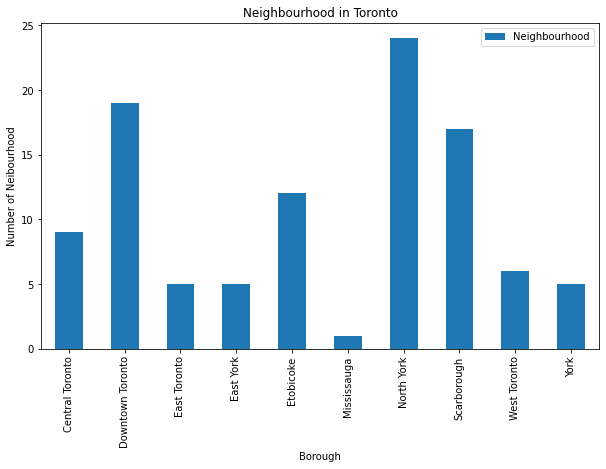

In [38]:
df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Number of Neibourhood') # add y-label to the plot
plt.title('Neighbourhood in Toronto') # add title to the plot

plt.show()

#### As shown in the graph, North York, Downtown Toronto and Scarborough are the top three borough with most number of neighbourhoods. These three borough will be the top choices for store owners to operate their businesses.

In [39]:
df['Latitude'] = ['43.6532', '43.6548', '43.6912', '43.6912', '43.6205', '43.5890', '43.7615', '43.7764', '43.6606', '43.6957']
df['Longitude'] = ['-79.3832', '-79.3883', '-79.3417', '-79.3417', '-79.5132', '-79.6441', '-79.4111', '-79.2318', '-79.4692', '79.4504']
df.reset_index(level=0, inplace=True)
df

,Borough,Neighbourhood,Latitude,Longitude
0,Central Toronto,9,43.6532,-79.3832
1,Downtown Toronto,19,43.6548,-79.3883
2,East Toronto,5,43.6912,-79.3417
3,East York,5,43.6912,-79.3417
4,Etobicoke,12,43.6205,-79.5132
5,Mississauga,1,43.5890,-79.6441
6,North York,24,43.7615,-79.4111
7,Scarborough,17,43.7764,-79.2318
8,West Toronto,6,43.6606,-79.4692
9,York,5,43.6957,79.4504


In [49]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins


print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [16]:
# define the world map centered around Canada with a higher zoom level
trt_map = folium.Map(location=[43.6532, -79.3832], zoom_start=4)

# display world map
trt_map

In [53]:
trt_map = folium.Map(location=[43.6532, -79.3832], zoom_start=12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(trt_map)


# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    #import pdb; pdb.set_trace()
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(trt_map)  
    
    folium.Marker(
        location=[float(lat), float(lng)],
        icon=None,
        popup=label,
    ).add_to(incidents)

trt_map

#### Eventhough North York borough has the most neighbourhoods (24), but it is far away from central Toronto. The central Toronto area near the lake has up to 6 neighbourhoods with more than 56 neighbourhoods near aroud. Hence, it is more suitable to operate a store near the central of Toronto.